In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data
df=pd.read_csv('messages.csv',encoding='latin-1')
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  
0  content - length : 3386 apple-iss research cen...      0  
1  lang classification grimes , joseph e . and ba...      0  
2  i am posting this inquiry for sergei atamas ( ...      0  
3  a colleague and i are researching the differin...      0  
4  earlier this morning i was on the phone with a...      0

In [3]:
# Looking for shape of the dataset
print('Shape of the dataset:',df.shape)

Shape of the dataset: (2893, 3)


In [4]:
# Looking for the information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [5]:
# Checking the Count of label
print('Count of each label:','\n',df['label'].value_counts())

Count of each label: 
 0    2412
1     481
Name: label, dtype: int64


In [6]:
# Checking the Ratio of label
print('Ratio of label 0 = ', round(len(df[df['label']==1]) / len(df.label),2)*100,'%')
print('Ratio of label 1 = ', round(len(df[df['label']==0]) / len(df.label),2)*100,'%')

Ratio of label 0 =  17.0 %
Ratio of label 1 =  83.0 %


In [7]:
# Adding a column(length) which indicates the length of message column
df['length'] = df['message'].str.len()
df.head(4)

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324

In [8]:
# Converting all messages to lower case
df['message']=df['message'].str.lower()
df.head(4)

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   

                                             message  label  length  
0  content - length : 3386 apple-iss research cen...      0    2856  
1  lang classification grimes , joseph e . and ba...      0    1800  
2  i am posting this inquiry for sergei atamas ( ...      0    1435  
3  a colleague and i are researching the differin...      0     324

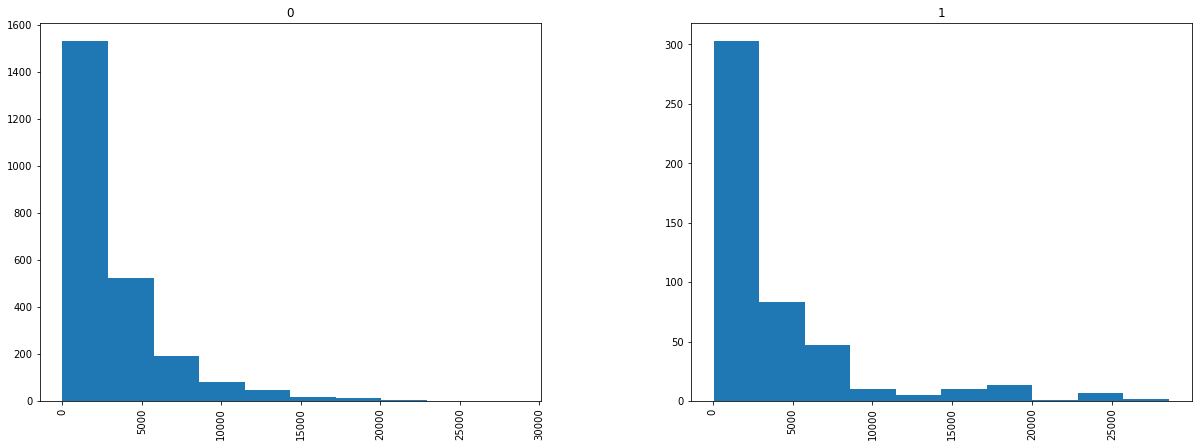

In [9]:
# Visualizing the length of label 0 & 1
df.hist(column='length', by='label', bins=10, figsize=(20,7));

# Building word dictionary

In [10]:
# Replacing the special characters(@,*,^) with 'emailaddress'
df['message'] = df['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','emailaddress')

# Replacing URLs with 'webaddress'
df['message'] = df['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','webaddress')

# Replacing money symbols with 'dollers'
df['message'] = df['message'].str.replace(r'£|\$', 'dollers')
    
# Replacing 10 digit phone numbers (formats include parenthesis, spaces, no spaces, dashes) with 'phonenumber'
df['message'] = df['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')

# Replacing numbers with 'numbr'
df['message'] = df['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [11]:
# Removing punctuations
df['message'] = df['message'].str.replace(r'[^\w\d\s]', ' ')

# Replacing whitespace between terms with a single space
df['message'] = df['message'].str.replace(r'\s+', ' ')

# Removinging leading and trailing whitespace
df['message'] = df['message'].str.replace(r'^\s+|\s+?$', '')

In [12]:
# Removing stopwords
import string
import nltk
from nltk.corpus import  stopwords

sw = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

df['message'] = df['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in sw))

In [13]:
# Adding column of cleaned length after puncuations,stopwords removal
df['length of cleaned data'] = df['message'].str.len()
df.head()

subject  \
0            job posting - apple-iss research center   
1                                                NaN   
2  query : letter frequencies for text identifica...   
3                                               risk   
4                           request book information   

                                             message  label  length  \
0  content length numbr apple iss research center...      0    2856   
1  lang classification grimes joseph e barbara f ...      0    1800   
2  posting inquiry sergei atamas satamas umabnet ...      0    1435   
3  colleague researching differing degrees risk p...      0     324   
4  earlier morning phone friend mine living south...      0    1046   

   length of cleaned data  
0                    2179  
1                    1454  
2                    1064  
3                     210  
4                     629

In [14]:
# Checking the original length & cleaned length
print('Original Length', df['length'].sum())
print('Cleaned Length', df['length of cleaned data'].sum())

Original Length 9344743
Cleaned Length 6767857


In [15]:
# Saving the Cleaned data into a csv file
df.to_csv("Cleaned_data.csv")

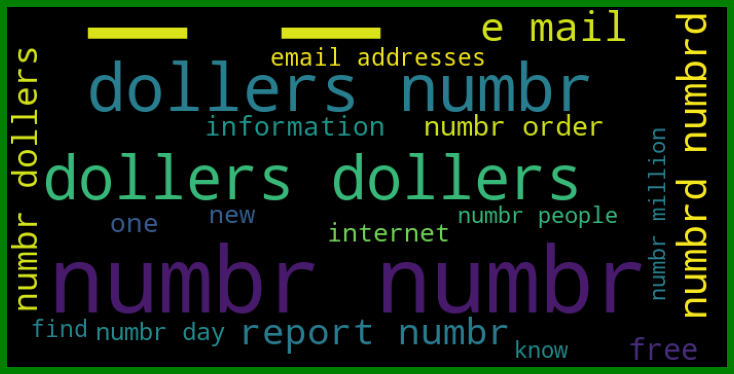

In [16]:
#Getting repeated words in label 1
from wordcloud import WordCloud
spam = df['message'][df['label']==1]
spam_cloud = WordCloud(width=700,height=350,background_color='black',max_words=20).generate(' '.join(spam))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

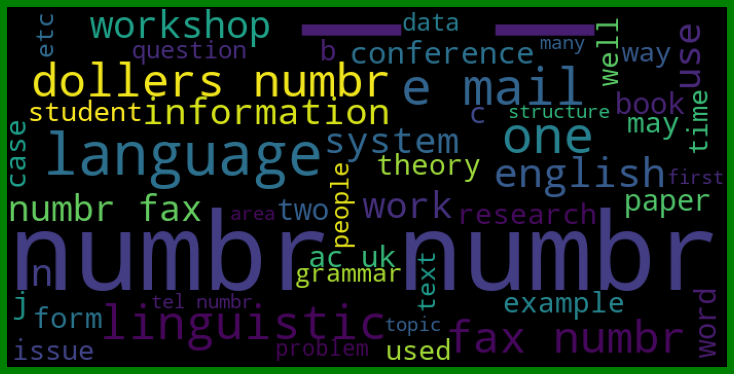

In [17]:
#Getting repeated words in label 0 
ham = df['message'][df['label']==0]
spam_cloud = WordCloud(width=700,height=350,background_color='black',max_words=50).generate(' '.join(ham))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Feature Extraction

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Using TfidfVectorizer to deal the frequent words
tf_vec = TfidfVectorizer()
features = tf_vec.fit_transform(df['message'])

#Seperating into input and output variables
x = features
y = df['label']

# Training classifiers

In [19]:
#Breaking our input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [20]:
# Importing all the model library
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Importing performance metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Finding the best parameters

In [21]:
model_params = {
    
    'MultinomialNB':{
        'model':MultinomialNB(),
        'params': {
            'alpha':[0.1,0.5,1.0,1.4],
            'fit_prior':['True','False']
        }   
    },
    
    'SVC':{
        'model':SVC(),
        'params': {
            'kernel':['rbf','poly'],
            'gamma':['scale','auto']
        }   
    },
    
     'logistic_regression' : {
        'model': LogisticRegression(),
        'params': {
            'penalty':['l1','l2','elasticnet'],
            'C': [1.0,5.0,7.0,10.0]
        }
    },
    
        'KNeighbors_Classifier':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[1,2,5,6],
            'n_jobs':[10,20,30,40]
        }
    },
    
        'Decision_Tree_Classifier': {
        'model':DecisionTreeClassifier(),
        'params':{
           'criterion':['gini','entropy'],
            'max_depth':[2,6,10,12]
       }
    },
                       
        'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [50,70,100,120],
             'min_samples_split':[1,2,4,6]
        }
    }
}

In [22]:
scores = []
from sklearn.model_selection import GridSearchCV,cross_val_score
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

In [23]:
# Making a dataframe best which contains model,best_score & best_params
best= pd.DataFrame(scores,columns=['model','best_score','best_params'])
# Viewing the dataframe
best

model  best_score  \
0             MultinomialNB    0.992740   
1                       SVC    0.972349   
2       logistic_regression    0.978571   
3     KNeighbors_Classifier    0.965431   
4  Decision_Tree_Classifier    0.963710   
5             random_forest    0.972692   

                                     best_params  
0            {'alpha': 0.1, 'fit_prior': 'True'}  
1            {'gamma': 'scale', 'kernel': 'rbf'}  
2                   {'C': 10.0, 'penalty': 'l2'}  
3               {'n_jobs': 10, 'n_neighbors': 5}  
4      {'criterion': 'entropy', 'max_depth': 12}  
5  {'min_samples_split': 4, 'n_estimators': 100}

In [24]:
# Passing the obtained best fit parameters into the model
mnb = MultinomialNB(alpha=0.1,fit_prior=True)
svc = SVC(gamma='scale',kernel='rbf')
lr = LogisticRegression(C=10.0,penalty='l2')
knc = KNeighborsClassifier(n_jobs=10,n_neighbors=5)
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=12)
rfc = RandomForestClassifier(min_samples_split=4,n_estimators=100)

# Performance evaluation using multiple metrics

In [25]:
# Checking all algorithms performance metrics using for loop
model = [mnb,svc,lr,knc,dtc,rfc]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,pred))
    print('\n')
    print('Confusion Matrix of',m,'is:')
    print(confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report of',m,'is:')
    print(classification_report(y_test,pred))
    print('==============================================================================================')
    print('\n')

Accuracy score of MultinomialNB(alpha=0.1) is:
0.9861830742659758


Confusion Matrix of MultinomialNB(alpha=0.1) is:
[[459   5]
 [  3 112]]


Classification Report of MultinomialNB(alpha=0.1) is:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       464
           1       0.96      0.97      0.97       115

    accuracy                           0.99       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.99      0.99      0.99       579



Accuracy score of SVC() is:
0.9740932642487047


Confusion Matrix of SVC() is:
[[463   1]
 [ 14 101]]


Classification Report of SVC() is:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       464
           1       0.99      0.88      0.93       115

    accuracy                           0.97       579
   macro avg       0.98      0.94      0.96       579
weighted avg       0.97      0.97      0.97       579



Accurac

MultinomialNB model has good accuracy score as well as f1-score. So,we consider MultinomialNB model as the best model.

Accuracy score of MultinomialNB(alpha=0.1) is:
0.9861830742659758
[[459   5]
 [  3 112]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       464
           1       0.96      0.97      0.97       115

    accuracy                           0.99       579
   macro avg       0.98      0.98      0.98       579
weighted avg       0.99      0.99      0.99       579



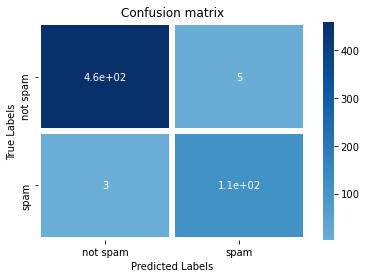

In [26]:
# Checking the performance metrics of MultinomialNB model in detail by visualizing Confusion matrix
mnb.fit(x_train,y_train)
mnb.score(x_train,y_train)
predmnb=mnb.predict(x_test)
print('Accuracy score of',mnb,'is:')
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))
conf_mat=confusion_matrix(y_test,predmnb)
ax=plt.subplot()
sns.heatmap(conf_mat,cmap='Blues',annot=True,ax=ax,linewidths=5,linecolor='w',center=0)
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')
ax.set_title('Confusion matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])
plt.show()

# Testing Predictions

In [27]:
all_predictions = mnb.predict(x_test[:])
all_predictions

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [28]:
print(x_test, predmnb)

  (0, 231)	0.02769386012049118
  (0, 1606)	0.01850588554984756
  (0, 1823)	0.033865131992033184
  (0, 2622)	0.06781918378757934
  (0, 3255)	0.05860797977564056
  (0, 4372)	0.025334217780309455
  (0, 6855)	0.0215336140798825
  (0, 7830)	0.031592319043306755
  (0, 9977)	0.03347422075670723
  (0, 10542)	0.04990864634373859
  (0, 11814)	0.04502993701180166
  (0, 12301)	0.058855472026239405
  (0, 14137)	0.03469963621326868
  (0, 14172)	0.16694345191017673
  (0, 14225)	0.3167780553484772
  (0, 14230)	0.16507090517058068
  (0, 14347)	0.054607620269426095
  (0, 14698)	0.022548738109011524
  (0, 15754)	0.06240264327166701
  (0, 15943)	0.13934478283014004
  (0, 15944)	0.14950337214625806
  (0, 16104)	0.04153240297064449
  (0, 16815)	0.01957923278114841
  (0, 16906)	0.05276664959663273
  (0, 17761)	0.025245508189883012
  :	:
  (578, 51565)	0.005216612514260109
  (578, 51576)	0.009429781723467036
  (578, 51585)	0.019047980875820755
  (578, 51658)	0.0100455199662303
  (578, 51790)	0.010417599947122

In [29]:
# Testing the email message is Spam/Not spam
prediction1 = mnb.predict(x_test[1])

if(prediction1[0]==0):
    print('The email message is Spam')
else:
    print('The email message is Not-Spam')

The email message is Spam


In [30]:
# Testing the email message is Spam/Not spam
prediction2 = mnb.predict(x_test[2])

if(prediction2[0]==0):
    print('The email message is Spam')
else:
    print('The email message is Not-Spam')

The email message is Not-Spam


# AUC ROC Curve

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [32]:
# Plotting AUC ROC Curve of best fit model(MultinomialNB)
mnb.fit(x_train,y_train)
y_pred_prob=mnb.predict_proba(x_test)[:,1]
y_pred_prob
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='MultinomialNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()
auc_score = roc_auc_score(y_test,predmnb)
print(auc_score)

0.9815685907046477


# Saving the best model in a pickle file

In [33]:
#importing joblib
import joblib
#saving the model in a pickle file
joblib.dump(mnb,'Email_Spam_Detection.pkl')

['Email_Spam_Detection.pkl']